In [1]:
import tweepy 
import csv
import json
import re
from tweepy import OAuthHandler
import datetime
import time

#load twitter credentials from file 
consumer_key = 'kAULSmYrpuA7idFEYJmmVJqsZ'
consumer_secret = 'NGyXI8OEKbNkpCfL1jrSLWy2pCSsZPz1nCE3P6qFXzh2Nqsog2'
access_token = '466693964-vVTSjjGghi6K4qnlReqfrUq0uPj4o4Jw8UYVGTNz'
access_token_secret = '7gweeKfNBJzDj4hqy4OmDqufBjcI7pP2KMpb5SWYqUxu0'

# Set up OAuth and integrate with API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [2]:
def datetime_from_utc_to_local(utc_datetime):
    now_timestamp = time.time()
    offset = datetime.datetime.fromtimestamp(now_timestamp) - datetime.datetime.utcfromtimestamp(now_timestamp)
    return utc_datetime + offset

In [3]:
#function to clean up the text of tweet 
def clean_tweet(tweet): 
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) (\w+:\/\/\S+)", " ", tweet).split())

In [106]:
#simpler function to get tweets, doesnt work? 
def get_tweets_simple(query, max_tweets):
    searched_tweets = [status for status in tweepy.Cursor(api.search, q=query).items(max_tweets)]
    tweets = []
    twees_date = []
    for tweet in searched_tweets:
        # empty dictionary to store required params of a tweet 
        parsed_tweet = {}
        # saving text of tweet 
        #parsed_tweet['text'] = clean_tweet(tweet.text)
        created_date_local = datetime_from_utc_to_local(tweet.created_at)
       # tweets = created_date_local
        parsed_tweet['date'] = created_date_local
        #print(created_date_local)
        #print(parsed_tweet.created_at )
        tweets.append(parsed_tweet)
    return tweets

In [5]:
#more complicated function to download tweets for given query
def get_tweets(query, max_tweets):
    searched_tweets = []
    last_id = -1
    while len(searched_tweets) < max_tweets:
        count = max_tweets - len(searched_tweets)
        try:
            new_tweets = api.search(q = query, count = count, max_id = str(last_id - 1))
            if not new_tweets:
                break
            searched_tweets.extend(new_tweets)
            last_id = new_tweets[-1].id
        except tweepy.TweepError as e:
        # depending on TweepError.code, one may want to retry or wait
        # to keep things simple, we will give up on an error
            break
            
    tweets = []
    for tweet in searched_tweets:
        # empty dictionary to store required params of a tweet 
        parsed_tweet = {}
        # saving text of tweet 
        parsed_tweet['text'] = clean_tweet(tweet.text)
        
        tweets.append(parsed_tweet)
            
    return tweets

In [6]:
#return all tweets from given screenname
def get_tweets_user(screen_name, max_tweets):
    searched_tweets = []
    last_id = -1
    while len(searched_tweets) < max_tweets:
        count = max_tweets - len(searched_tweets)
        try:
            #new_tweets = api.user_timeline(id = screenname, count = count, max_id = str(last_id - 1))
            new_tweets = api.user_timeline(screen_name = screen_name, count = max_tweets, include_rts = True)
            if not new_tweets:
                break
            searched_tweets.extend(new_tweets)
            last_id = new_tweets[-1].id
        except tweepy.TweepError as e:
        # depending on TweepError.code, one may want to retry or wait
        # to keep things simple, we will give up on an error
            break
            
    tweets = []
    for tweet in searched_tweets:
        # empty dictionary to store required params of a tweet 
        parsed_tweet = {}
        # saving text of tweet 
        parsed_tweet['text'] = clean_tweet(tweet.text)
        tweets.append(parsed_tweet)
            
    return tweets

In [134]:
tweets_about_donald = get_tweets_simple('Game of Thrones', 100)

In [146]:
tweet_date = []
tweet_count_min = []
for tweet in tweets_about_donald:
    tweet_date.append(tweet['date'])
    minute = tweet['date'].minute
    while = minute 
    #while minute==minute
    #print(tweet_date.minute)
#print(tweets)
#tweet_date

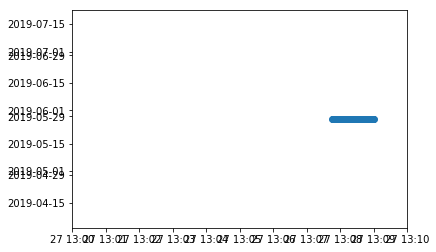

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime
#print(tweet_date)
plt.scatter(tweet_date,tweet_date);
plt.xlim([datetime.datetime(2019, 5, 27,13,00,00), datetime.datetime(2019, 5, 27,13,10,00)]);

In [136]:
baracks_tweets = get_tweets_user('toej93', 10)

In [ ]:
for tweet in baracks_tweets:
    #print(tweet['text'])
    #created_date_local = datetime_from_utc_to_local(tweet.created_at)
    #print(tweet["created_at"])